# Keras - Classifying MNIST dataset with Logistic Regression

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23 percent. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8 percent.An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits.

### Loading the MNIST dataset

In [190]:
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape
print "x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape

x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Plotting digits

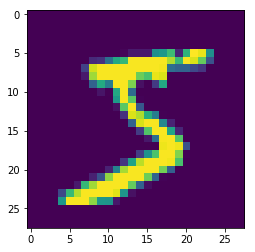

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0]) #plots the first digit stored in the training dataset

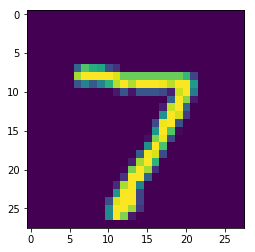

In [192]:
plt.imshow(x_test[0]) #plots the first digit stored in the testing dataset

### Reshaping inputs

In [193]:
input_dim = 784 #28 by 28
x_train_reshape = x_train.reshape(60000, input_dim)
x_test_reshape = x_test.reshape(10000, input_dim)
print x_train.shape, "=>", x_train_reshape.shape
print x_test.shape,  "=>", x_test_reshape.shape

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Casting inputs to float32

In [194]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Normalizing the inputs

In [195]:
x_train_reshape /= 255
x_test_reshape  /= 255

### Converting labels to one-hot vectors

In [196]:
from keras.utils import np_utils

y_train_one_hot = np_utils.to_categorical(y_train, nb_classes) #nb_classes = 10 (number of classes)
y_test_one_hot  = np_utils.to_categorical(y_test, nb_classes)
print "Dimension of y_train_one_hot = ", y_train_one_hot.shape
print "Dimension of y_test_one_hot  = ", y_test_one_hot.shape
print y_train[0], "=>", y_train_one_hot[0]
print y_test[0],  "=>", y_test_one_hot[0]

Dimension of y_train_one_hot =  (60000, 10)
Dimension of y_test_one_hot  =  (10000, 10)
5 => [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
7 => [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


### Building the logistic model

In [197]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(output_dim=nb_classes, input_dim=input_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


/home/tgi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", input_dim=784)`
  """


### Compiling the model

In [198]:
from keras import optimizers

sgd_optimizer = optimizers.sgd(lr=0.01)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model

In [203]:
model.fit(x=x_train_reshape, y=y_train_one_hot, batch_size=128, epochs=20, verbose=1, 
          validation_data=(x_test_reshape, y_test_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s - loss: 1.9685 - acc: 0.3795 - val_loss: 1.9700 - val_acc: 0.3738
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 1.9670 - acc: 0.3795 - val_loss: 1.9686 - val_acc: 0.3739
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 1.9655 - acc: 0.3797 - val_loss: 1.9672 - val_acc: 0.3739
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 1.9640 - acc: 0.3800 - val_loss: 1.9658 - val_acc: 0.3740
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 1.9625 - acc: 0.3802 - val_loss: 1.9644 - val_acc: 0.3743
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 1.9611 - acc: 0.3802 - val_loss: 1.9631 - val_acc: 0.3745
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 1.9597 - acc: 0.3805 - val_loss: 1.9617 - val_acc: 0.3745
Epoch 8/20
60000/60000 [==============================] - 1s 

In [204]:
score = model.evaluate(x_test_reshape, y_test_one_hot, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

('Test score:', 1.9457175031661986)
('Test accuracy:', 0.378)
